In [9]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile.discover import snippets
import pandas as pd
from pyts.image import RecurrencePlot
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
from scipy.ndimage.interpolation import zoom


In [173]:
df = pd.read_csv('lstm.csv',converters={"data":lambda x: np.array(json.loads(x)),
                                       "snippet":lambda x: np.array(json.loads(x))})
print(df["idx"].unique())
df["class"]=df["class"].apply(lambda x: np.full(300, x))

[0 2 3 1]


In [157]:
X=np.stack(df[["snippet","data","class"]].apply(lambda x: np.stack(x.values),axis=1))
y=df.true.values.reshape(-1,1)

In [171]:
df["class"].unique()

TypeError: unhashable type: 'numpy.ndarray'

In [158]:
X.shape

(6701, 3, 300)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [174]:
from keras.layers import TimeDistributed
from keras.layers import Reshape
from keras.layers import Conv2D,Lambda, Activation, LSTM
from keras.utils import to_categorical
from keras.models import Model,Input
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape,GlobalAveragePooling2D,AveragePooling2D
from keras import backend as K
from tensorflow.keras.layers import GRU,Reshape,Dropout

In [176]:
def get_model():
    model = Sequential()
    input_layer = Input((300, 1),name="img_input",dtype='float32')
    output = GRU(128, kernel_initializer='he_normal',  activation='relu')(input_layer)
    output = Dropout(0.2)(output)
    output = Dense(1)(output)    
    model = Model(inputs=input_layer, outputs=output)
    model.summary() 
    model.compile(loss="mse", optimizer="adam")
    
    return model

def get_model_snippet():
    model = Sequential()
    input_layer = Input((300,2),name="img_input",dtype='float32')
    output = GRU(128, kernel_initializer='he_normal',  activation='relu')(input_layer)
    output = Dropout(0.2)(output)
    output = Dense(1)(output)    
    model = Model(inputs=input_layer, outputs=output)
    model.summary() 
    model.compile(loss="mse", optimizer="adam")
    return model
    

def get_model_class():
    model = Sequential()
    input_layer = Input((301,1),name="img_input",dtype='float32')
    output = GRU(128, kernel_initializer='he_normal',  activation='relu')(input_layer)
    output = Dropout(0.2)(output)
    output = Dense(1)(output)    
    model = Model(inputs=input_layer, outputs=output)
    model.summary() 
    model.compile(loss="mse", optimizer="adam")
    return model
    
    return model
model = get_model()
model_snippet = get_model_snippet()
model_class = get_model_class()

Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 300, 1)]          0         
_________________________________________________________________
gru_53 (GRU)                 (None, 128)               50304     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 300, 2)]          0         
____________________________________

In [184]:
histor = model.fit(X_train[:,1],
          y_train,
          validation_data=(X_valid[:,1],y_valid),
          #callbacks=[learning_rate_reduction], 
          batch_size=25, epochs=15)

Epoch 1/15
121/121 [==============================] - 16s 129ms/step - loss: 1.3510 - val_loss: 1.4756
Epoch 2/15
121/121 [==============================] - 14s 118ms/step - loss: 1.2972 - val_loss: 1.5439
Epoch 3/15
121/121 [==============================] - 13s 111ms/step - loss: 1.3043 - val_loss: 1.4586
Epoch 4/15
121/121 [==============================] - 14s 112ms/step - loss: 1.2954 - val_loss: 1.5261
Epoch 5/15
121/121 [==============================] - 13s 110ms/step - loss: 1.1568 - val_loss: 1.4450
Epoch 6/15
121/121 [==============================] - 13s 109ms/step - loss: 1.2314 - val_loss: 1.4637
Epoch 7/15
121/121 [==============================] - 13s 109ms/step - loss: 1.1480 - val_loss: 1.8942
Epoch 8/15
121/121 [==============================] - 14s 113ms/step - loss: 1.1321 - val_loss: 1.3366
Epoch 9/15
121/121 [==============================] - 13s 110ms/step - loss: 1.0763 - val_loss: 1.3716
Epoch 10/15
121/121 [==============================] - 14s 112ms/step - l

In [185]:
X_train[:,0:2].shape

(3007, 2, 300)

In [186]:

histor_snipp = model_snippet.fit(X_train[:,0:2].reshape(-1,300,2),
          y_train,
          validation_data=(X_valid[:,0:2].reshape(-1,300,2),y_valid),
          #callbacks=[learning_rate_reduction], 
          batch_size=25, epochs=15)

Epoch 1/15
121/121 [==============================] - 13s 110ms/step - loss: 1.1796 - val_loss: 1.8530
Epoch 2/15
121/121 [==============================] - 13s 111ms/step - loss: 1.2187 - val_loss: 1.5673
Epoch 3/15
121/121 [==============================] - 14s 112ms/step - loss: 1.1789 - val_loss: 1.5439
Epoch 4/15
121/121 [==============================] - 13s 110ms/step - loss: 1.1070 - val_loss: 1.6277
Epoch 5/15
121/121 [==============================] - 13s 110ms/step - loss: 1.0962 - val_loss: 1.5675
Epoch 6/15
121/121 [==============================] - 13s 109ms/step - loss: 1.0174 - val_loss: 1.4903
Epoch 7/15
121/121 [==============================] - 14s 112ms/step - loss: 1.0769 - val_loss: 1.4753
Epoch 8/15
121/121 [==============================] - 13s 109ms/step - loss: 0.9896 - val_loss: 1.5950
Epoch 9/15
121/121 [==============================] - 14s 116ms/step - loss: 0.9659 - val_loss: 1.6805
Epoch 10/15
121/121 [==============================] - 15s 126ms/step - l

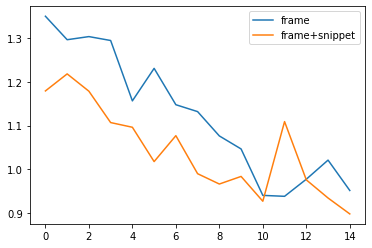

In [187]:
plt.plot(histor.history["loss"],label="frame")
plt.plot(histor_snipp.history["loss"],label="frame+snippet")
#plt.plot(histor_class.history["val_loss"],label="frame+class")
plt.legend()

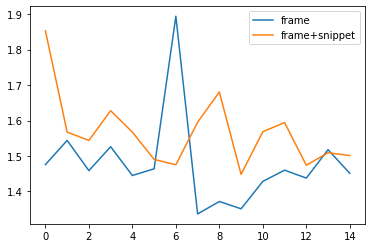

In [188]:
plt.plot(histor.history["val_loss"],label="frame")
plt.plot(histor_snipp.history["val_loss"],label="frame+snippet")
#plt.plot(histor_class.history["val_loss"],label="frame+class")

plt.legend()

In [189]:
from sklearn.metrics import mean_absolute_error
print("mae frame: ",mean_absolute_error(y_test, model.predict(X_test[:,1])))
print("mae frame_snippet: ",mean_absolute_error(y_test, model_snippet.predict(X_test[:,0:2].reshape(-1,300,2))))

mae frame:  0.7576365625652364
mae frame_snippet:  0.7648967620820734
